In [1]:
import pandas as pd
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
# pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_excel("ODI-2023.xlsx")
df.head()

,Tijdstempel,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,I have used ChatGPT to help me with some of my study assignments,When is your birthday (date)?,How many students do you estimate there are in the room?,Did you stand up to come to your previous answer ?,What is your stress level (0-100)?,How many hours per week do you do sports (in whole hours)?,Give a random number,Time you went to bed Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
0,2023-04-04 12:08:33.342,Masters - AI,yes,0,mu,nee,gender fluid,yes,23/11/1997,319,unknown,100,0,69,11:30,Ashes,Not ashes
1,2023-04-04 12:08:36.017,Artificial Intelligence,no,0,sigma,nee,male,not willing to say,"5th August, 1995",600,no,60,2,42,23.00,good food,good sleep
2,2023-04-04 12:08:37.501,AI,no,0,mu,nee,female,no,21/09,220,no,20,5,17,23:30,Sports,Friends
3,2023-04-04 12:08:51.909,Data mining,yes,1,mu,ja,male,yes,25-06-1996,100,unknown,50,5,12,11,Gym,Piano
4,2023-04-04 12:08:59.019,Quantitative Risk Management,no,0,mu,nee,male,yes,18-08-1998,300,no,65,10,874,11,Relax,Sun


In [4]:
months = {'january': 1,'jan': 1,'february': 2,'feb': 2,'march': 3,'april': 4,'may': 5,'june': 6,'july': 7,
    'august': 8 ,'september': 9,'sept': 9,'october': 10,'november': 11,'december': 12,'th': "",'nd':"",'fr':"",'bc':''}    

In [5]:
# correct "When is your birthday (date)?" column

birthday  = df["When is your birthday (date)?"]
for x in range(len(birthday)):
    birthday[x] = str(birthday[x]).lower()
    for i in months:
        if i in birthday[x]:
            birthday[x] = birthday[x].replace(i,str(months[i]))
    temp = ""
    for y in range(len(birthday[x])):
        if not birthday[x][y].isalpha() and not birthday[x][y].isdigit():
            temp += " "
        else:
            temp += birthday[x][y]
    birthday[x] = temp.strip()
    if len(birthday[x])<8 or len(birthday[x])>10 or birthday[x].count(" ")!=2:
        birthday[x] = "NaN"
    
    birthday[x]= birthday[x].split(" ")
    
for i in range(len(birthday)):
    if len(str(birthday[i][0]))==4:
        birthday[i][0],birthday[i][-1]=birthday[i][-1],birthday[i][0]
    
    if not birthday[i][-1] == "NaN":
        if int(birthday[i][-1]) < 1950:
            birthday[i] = ["NaN"]
            
for i in range(len(birthday)):
    birthday[i] = " ".join([str(elem) for elem in birthday[i]])
    
# df['When is your birthday (date)?'] = pd.to_datetime(df['When is your birthday (date)?'], format='%d %m %Y')


In [6]:
# correct "What is your stress level (0-100)?" column

for index, row in df.iterrows():
    stress_level = str(row['What is your stress level (0-100)?'])    

    if not stress_level.isdigit() or int(stress_level) < 0 or int(stress_level) > 100:
        df['What is your stress level (0-100)?'][index] = "NaN"

In [7]:
# replace the levels of the words with numbers
row_values={"yes":1, "no":0 , "mu":1 , "sigma":0, "ja":1, "nee":0, "unknown":"NaN",
           "male":1, "female":2, "intersex":3, "nonbinary":4, "non-binary":4, "gender fluid":5, "other":6,
            "not willing to answer":7,"not willing to say":8}

for key, value in df.iteritems():
    for ele in range(len(value)):
        if value[ele] in row_values.keys():
            value[ele] = row_values[value[ele]]   

In [8]:
# correct "How many students do you estimate there are in the room?" column

for index, row in df.iterrows():
    students_num = str(row['How many students do you estimate there are in the room?'])
    numbers = r'^[10-1000]$'
    if not students_num.isdigit() or int(students_num) < 10 or int(students_num) > 1000:
        df['How many students do you estimate there are in the room?'][index] = "NaN"

In [9]:
# correct "How many hours per week do you do sports (in whole hours)? " column

# remove the characters
for index, row in df.iterrows():
    students_num = str(row["How many hours per week do you do sports (in whole hours)? "])
    numbers = r'^[0-9]{1,3}\W[0-9]{1,3}$'     
    if re.search(numbers, students_num): 
        if "-" in students_num:
            indx = students_num.index('-')
            students_num = str(int((int(students_num[:indx:]) + int(students_num[indx+1::]))/2))
            df["How many hours per week do you do sports (in whole hours)? "][index] = students_num
            pass
        if "/" in students_num:
            indx = students_num.index('/')
            students_num = str(int(students_num[:indx:]) + int(students_num[indx+1::]))
            df["How many hours per week do you do sports (in whole hours)? "][index] = students_num
            pass
        else:
            df["How many hours per week do you do sports (in whole hours)? "][index] = str(int(float(students_num)))
            pass

# remove the words
for index, row in df.iterrows():
    temp = ""
    students_hours = str(row["How many hours per week do you do sports (in whole hours)? "])
    for y in range(len(students_hours)):
        if not students_hours[y].isdigit():
            temp += ""
        else:
            temp += students_hours[y]  
        df["How many hours per week do you do sports (in whole hours)? "][index] = temp.strip()            
# replace empty string and stranges numbers with non
for index, row in df.iterrows():
    students_hours = str(row["How many hours per week do you do sports (in whole hours)? "])
    if not students_hours.isdigit() or int(students_hours) < 0 or int(students_hours) > 150:
        df["How many hours per week do you do sports (in whole hours)? "][index] = "NaN"


In [10]:
# remove the words
for index, row in df.iterrows():
    temp = ""
    bed_time = str(row['Time you went to bed Yesterday'])
    for y in range(len(bed_time)):
        if not bed_time[y].isdigit():
            temp += " "
        else:
            temp += bed_time[y]  
        df['Time you went to bed Yesterday'][index] = temp.strip()
        
# make the same format
for index, row in df.iterrows():
    bed_time = str(row['Time you went to bed Yesterday']).strip()
    
    if len(bed_time) ==5:
        bed_time=bed_time[:2:]+":"+bed_time[3::]
        df['Time you went to bed Yesterday'][index] = bed_time
        
    if len(bed_time) ==4:
        bed_time=bed_time[:2:]+":"+bed_time[2::]
        df['Time you went to bed Yesterday'][index] = bed_time
        
    if len(bed_time) ==2:
        temp= bed_time + ":00"
        df['Time you went to bed Yesterday'][index] = temp

    if len(bed_time) ==1:
        temp= "0"+ bed_time + ":00"
        df['Time you went to bed Yesterday'][index] = temp  
        
    if len(bed_time) ==0:
        df['Time you went to bed Yesterday'][index] = "NaN"         
        
for index, row in df.iterrows():
    df['Time you went to bed Yesterday'][index]=df['Time you went to bed Yesterday'][index].replace("12","00")
    df['Time you went to bed Yesterday'][index]=df['Time you went to bed Yesterday'][index].replace("24","00")
    df['Time you went to bed Yesterday'][index]=df['Time you went to bed Yesterday'][index].replace("11","23")


In [11]:
courses = {'artificial intelligence': "AI",
          'ai': "AI",
           'artif': "AI",
          "quantitative risk management":"Quantitative Risk Management",
          'business analytics': "BA",
           'ba': "BA",
           "finance":"Finance",
           
           "computer science":"CS",
           "cs":"CS",
           
           "information sciences":"Info Sci",
           "info sci":"Info Sci",

           "computational science":"Comp Sci",
           "comp sci":"Comp Sci",
           
           "biomedical sciences":"Bio Sci",
           "bio sci":"Bio Sci",
           "phd":"PHD",
           "exchange":"Exchange",
           "high school 3rd grade":"High School 3rd Grade",
           "big data engineering":"Big Data Eng",
           "big data eng":"Big Data Eng",
           "digital business":"Digital Business",
           "human language":"Human Language Tech",
           "cls":"CLS",
           "neuroscience":"Neuroscience",
           "data mining":"Data Mining",
           "qrm":"QRM",
           "policy analysis":"Policy Analysis"       

          } 

In [12]:
for index, row in df.iterrows():
    df['What programme are you in?'][index]=str(df['What programme are you in?'][index]).lower()

for index, row in df.iterrows():
     for i in courses:
        if i in df['What programme are you in?'][index]:            
            df['What programme are you in?'][index] = courses[i]
            
for index, row in df.iterrows(): 
    if not df['What programme are you in?'][index] in courses.values():
        df['What programme are you in?'][index] = "NaN"

In [13]:
# calculat age 

from datetime import datetime

# Convert the column to a Timestamp object
df['When is your birthday (date)?'] = pd.to_datetime(df['When is your birthday (date)?'], format='%d %m %Y', errors='coerce')

# Calculate the age in years
now = datetime.now()
df['age'] = (now - df['When is your birthday (date)?']) // pd.Timedelta(days=365.25)
df.insert(9, 'age', df.pop('age'))


In [14]:
# get the second last row
second_last_row = df.iloc[-2]
# drop the second last row
df = df.drop(df.index[-2])
# insert the second last row as the first row
df = pd.concat([second_last_row.to_frame().T, df], ignore_index=True)

In [15]:
df.to_csv('new_data_before_miss_value.csv', index=False)
df.to_excel('new_data_before_miss_value.xlsx', index=False)


In [16]:
# df['What programme are you in?'].nunique()

In [17]:
df = pd.read_csv("new_data_before_miss_value.csv")

In [19]:
df.nunique()

Tijdstempel                                                          302
What programme are you in?                                            19
Have you taken a course on machine learning?                           2
Have you taken a course on information retrieval?                      2
Have you taken a course on statistics?                                 2
Have you taken a course on databases?                                  2
What is your gender?                                                   6
I have used ChatGPT to help me with some of my study assignments       3
When is your birthday (date)?                                        204
age                                                                   16
How many students do you estimate there are in the room?              99
Did you stand up to come to your previous answer    ?                  2
What is your stress level (0-100)?                                    56
How many hours per week do you do sports (in whole 

In [20]:
df.isnull().sum(axis = 0)

Tijdstempel                                                           0
What programme are you in?                                            5
Have you taken a course on machine learning?                          3
Have you taken a course on information retrieval?                    23
Have you taken a course on statistics?                               16
Have you taken a course on databases?                                 1
What is your gender?                                                  0
I have used ChatGPT to help me with some of my study assignments      0
When is your birthday (date)?                                        83
age                                                                  83
How many students do you estimate there are in the room?              8
Did you stand up to come to your previous answer    ?                12
What is your stress level (0-100)?                                   21
How many hours per week do you do sports (in whole hours)?      

In [21]:
# full the missing valuse
for columnName, columnData in df.iteritems():
    # Check if the data type of the column is numeric
    if df[columnName].dtype != 'object':
        # If the data type is numeric, interpolate and round the column
        df[columnName] = df[columnName].interpolate(method='linear').round()
    else:
        # Replace missing values with the mode of the column
        mode = df[columnName].mode()[0]
        df[columnName].fillna(mode, inplace=True)

In [22]:
df.isnull().sum(axis = 0)

Tijdstempel                                                          0
What programme are you in?                                           0
Have you taken a course on machine learning?                         0
Have you taken a course on information retrieval?                    0
Have you taken a course on statistics?                               0
Have you taken a course on databases?                                0
What is your gender?                                                 0
I have used ChatGPT to help me with some of my study assignments     0
When is your birthday (date)?                                        0
age                                                                  0
How many students do you estimate there are in the room?             0
Did you stand up to come to your previous answer    ?                0
What is your stress level (0-100)?                                   0
How many hours per week do you do sports (in whole hours)?           0
Give a

In [23]:
df.nunique()

Tijdstempel                                                          302
What programme are you in?                                            19
Have you taken a course on machine learning?                           2
Have you taken a course on information retrieval?                      2
Have you taken a course on statistics?                                 2
Have you taken a course on databases?                                  2
What is your gender?                                                   6
I have used ChatGPT to help me with some of my study assignments       3
When is your birthday (date)?                                        204
age                                                                   16
How many students do you estimate there are in the room?             102
Did you stand up to come to your previous answer    ?                  2
What is your stress level (0-100)?                                    60
How many hours per week do you do sports (in whole 

In [25]:
# save the New_data
df.to_csv('new_data_fill_missing_linear&mode.csv', index=False)

In [26]:
df = pd.read_csv("new_data_before_miss_value.csv")


In [27]:
df.nunique()

Tijdstempel                                                          302
What programme are you in?                                            19
Have you taken a course on machine learning?                           2
Have you taken a course on information retrieval?                      2
Have you taken a course on statistics?                                 2
Have you taken a course on databases?                                  2
What is your gender?                                                   6
I have used ChatGPT to help me with some of my study assignments       3
When is your birthday (date)?                                        204
age                                                                   16
How many students do you estimate there are in the room?              99
Did you stand up to come to your previous answer    ?                  2
What is your stress level (0-100)?                                    56
How many hours per week do you do sports (in whole 

In [28]:
df.isnull().sum(axis = 0)

Tijdstempel                                                           0
What programme are you in?                                            5
Have you taken a course on machine learning?                          3
Have you taken a course on information retrieval?                    23
Have you taken a course on statistics?                               16
Have you taken a course on databases?                                 1
What is your gender?                                                  0
I have used ChatGPT to help me with some of my study assignments      0
When is your birthday (date)?                                        83
age                                                                  83
How many students do you estimate there are in the room?              8
Did you stand up to come to your previous answer    ?                12
What is your stress level (0-100)?                                   21
How many hours per week do you do sports (in whole hours)?      

In [33]:
# fill with prevous row values
df = df.fillna(method='pad')

In [30]:
df.nunique()

Tijdstempel                                                          302
What programme are you in?                                            19
Have you taken a course on machine learning?                           2
Have you taken a course on information retrieval?                      2
Have you taken a course on statistics?                                 2
Have you taken a course on databases?                                  2
What is your gender?                                                   6
I have used ChatGPT to help me with some of my study assignments       3
When is your birthday (date)?                                        204
age                                                                   16
How many students do you estimate there are in the room?              99
Did you stand up to come to your previous answer    ?                  2
What is your stress level (0-100)?                                    56
How many hours per week do you do sports (in whole 

In [31]:
df.isnull().sum(axis = 0)

Tijdstempel                                                          0
What programme are you in?                                           0
Have you taken a course on machine learning?                         0
Have you taken a course on information retrieval?                    0
Have you taken a course on statistics?                               0
Have you taken a course on databases?                                0
What is your gender?                                                 0
I have used ChatGPT to help me with some of my study assignments     0
When is your birthday (date)?                                        0
age                                                                  0
How many students do you estimate there are in the room?             0
Did you stand up to come to your previous answer    ?                0
What is your stress level (0-100)?                                   0
How many hours per week do you do sports (in whole hours)?           0
Give a

In [32]:
# save the New_data
df.to_csv('new_data_fill_missing_with_previous_row.csv', index=False)

# Task 1A_b


In [35]:
import seaborn as sns


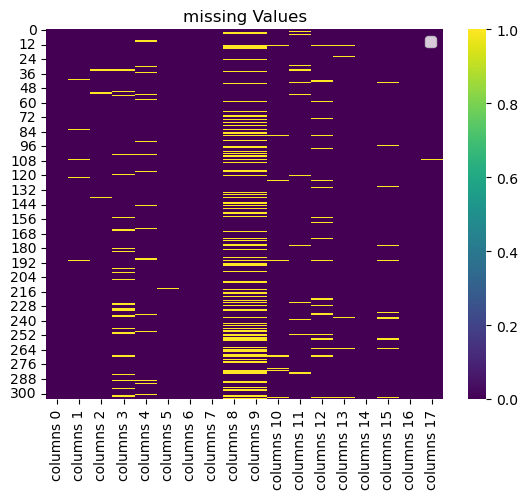

In [171]:
df = pd.read_csv('new_data_before_miss_value.csv')

# Create a heatmap to visualize the missing values
plt = sns.heatmap(df.isnull(), cmap='viridis',xticklabels = [f"columns {i}" for i in range(len(df.columns))])
plt.set_title('missing Values')
plt.legend(df.columns)


Text(0.5, 23.52222222222222, 'Features')

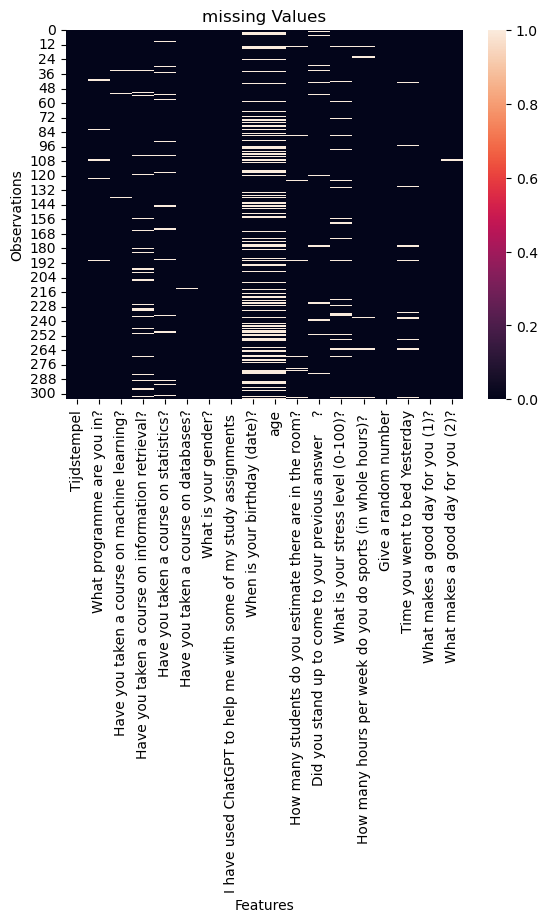

In [166]:
plt = sns.heatmap(df.isnull())
plt.set_title('missing Values')
plt.set_ylabel('Observations')
plt.set_xlabel('Features')

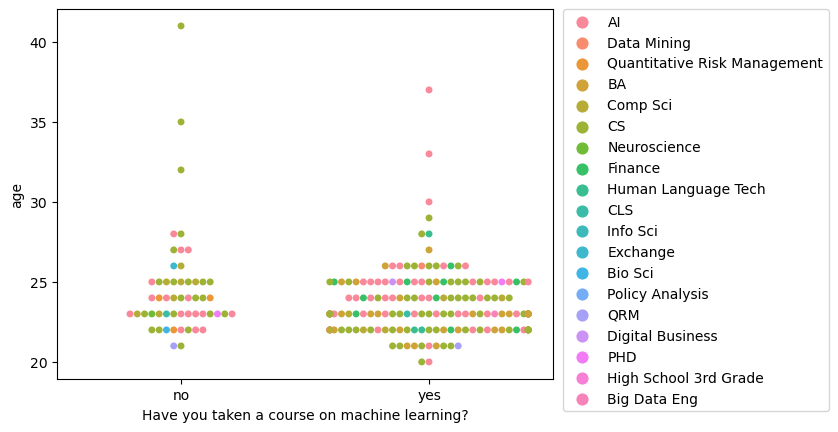

In [58]:
x = sns.swarmplot(data=df, x=df['Have you taken a course on machine learning?'],y=df["age"],hue=df["What programme are you in?"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
x.set_xticklabels(["no","yes"]);

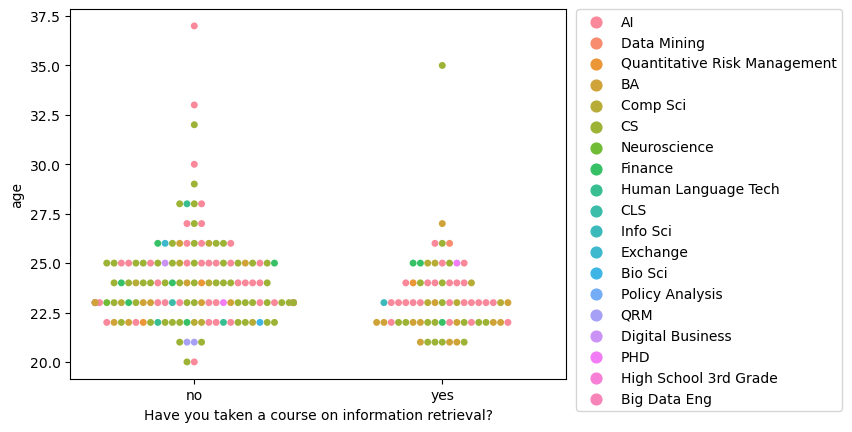

In [57]:
x = sns.swarmplot(data=df, x=df['Have you taken a course on information retrieval?'],y=df["age"],hue=df["What programme are you in?"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
x.set_xticklabels(["no","yes"]);

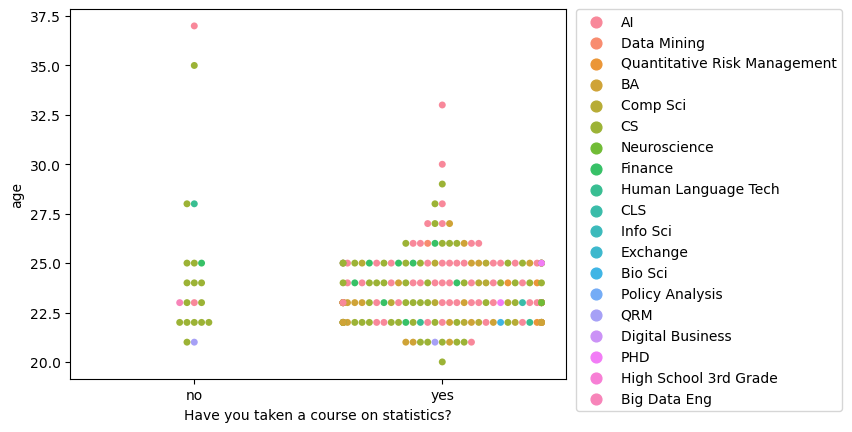

In [59]:
x = sns.swarmplot(data=df, x=df['Have you taken a course on statistics?'],y=df["age"],hue=df["What programme are you in?"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
x.set_xticklabels(["no","yes"]);

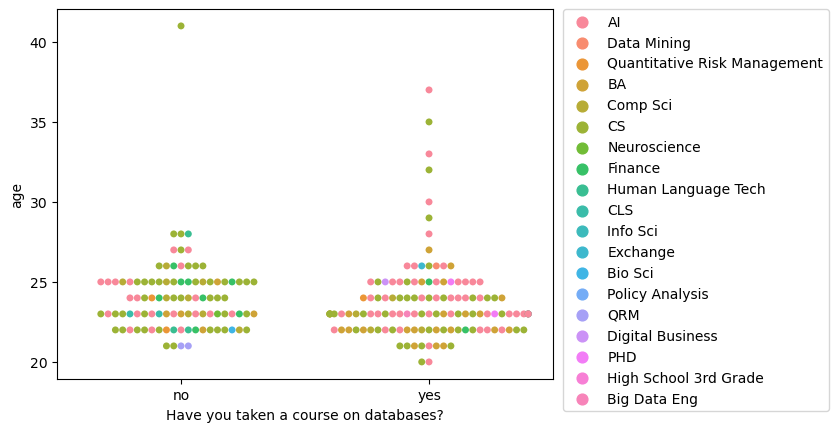

In [60]:
x = sns.swarmplot(data=df, x=df['Have you taken a course on databases?'],y=df["age"],hue=df["What programme are you in?"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
x.set_xticklabels(["no","yes"]);

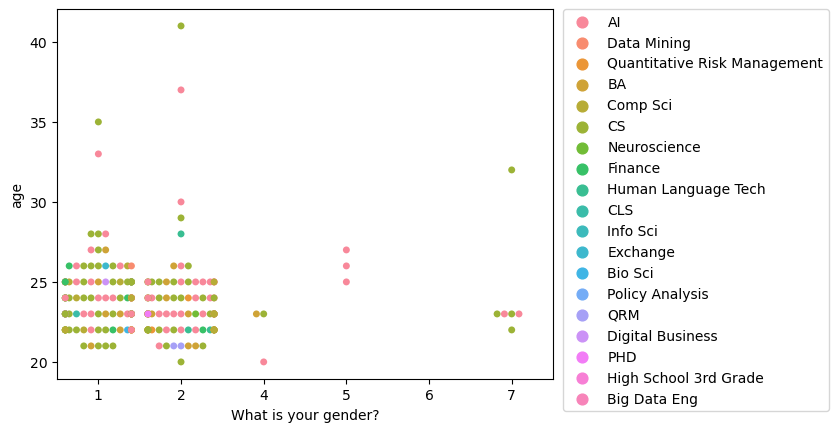

In [62]:
x = sns.swarmplot(data=df, x=df['What is your gender?'],y=df["age"],hue=df["What programme are you in?"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# x.set_xticklabels(["no","yes"]);

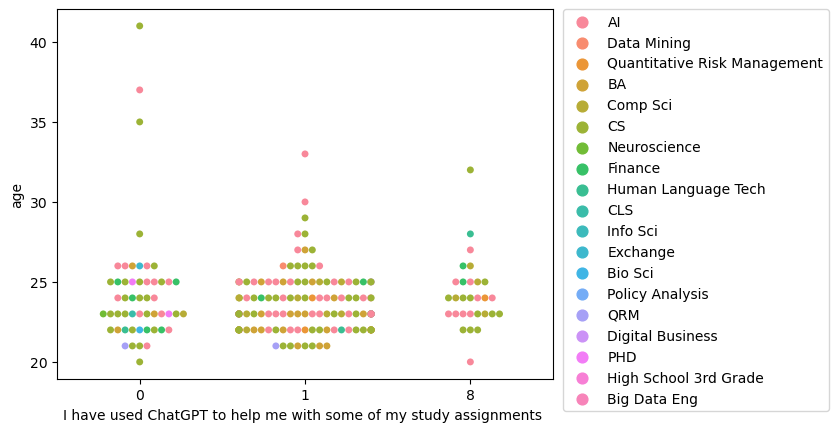

In [68]:
x = sns.swarmplot(data=df, x=df['I have used ChatGPT to help me with some of my study assignments '],y=df["age"],hue=df["What programme are you in?"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
# x.set_xticklabels(["no","yes"]);

In [85]:
df['Time you went to bed Yesterday'] = df['Time you went to bed Yesterday'].str.replace(' ', '')
df['Time you went to bed Yesterday'] = pd.to_datetime(df['Time you went to bed Yesterday'], format='%H:%M')

# Extract the hour information
df['Hour'] = df['Time you went to bed Yesterday'].dt.hour

# Cluster the data based on the hour
clusters = df.groupby('Hour')

In [90]:
df['Hour']

0       4.0
1      23.0
2      23.0
3      23.0
4      23.0
       ... 
300     1.0
301     1.0
302     4.0
303     NaN
304    22.0
Name: Hour, Length: 305, dtype: float64

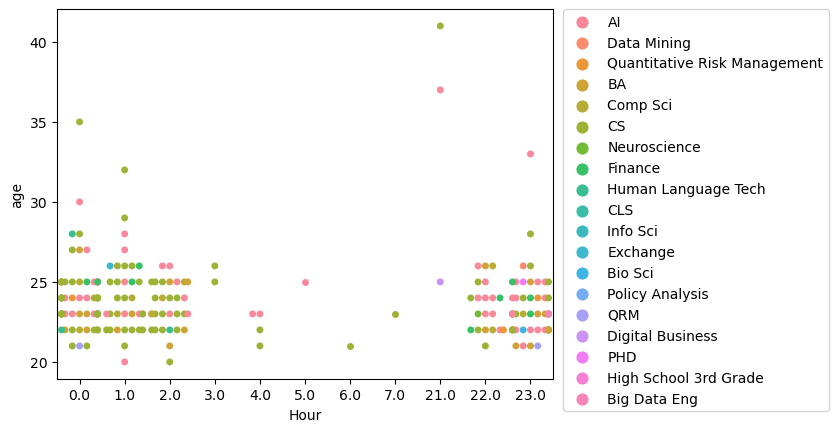

In [92]:
#Time you went to bed Yesterday
x = sns.swarmplot(data=df, x=df['Hour'],y=df["age"],hue=df["What programme are you in?"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

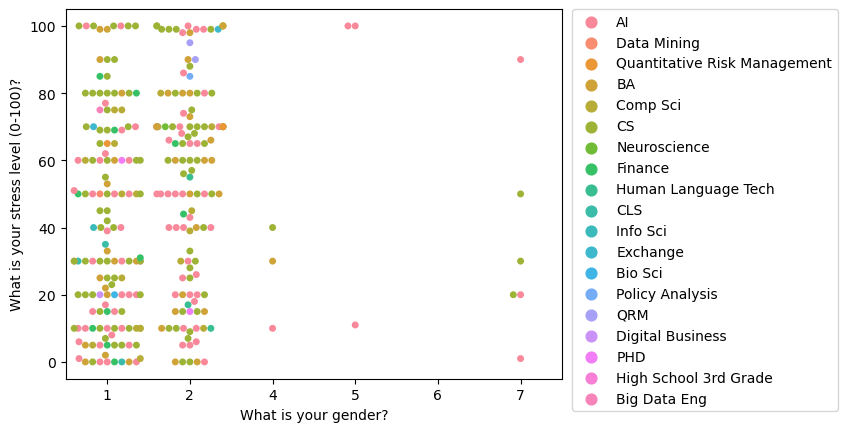

In [97]:
x = sns.swarmplot(data=df, x=df['What is your gender?'],y=df["What is your stress level (0-100)?"],hue=df["What programme are you in?"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

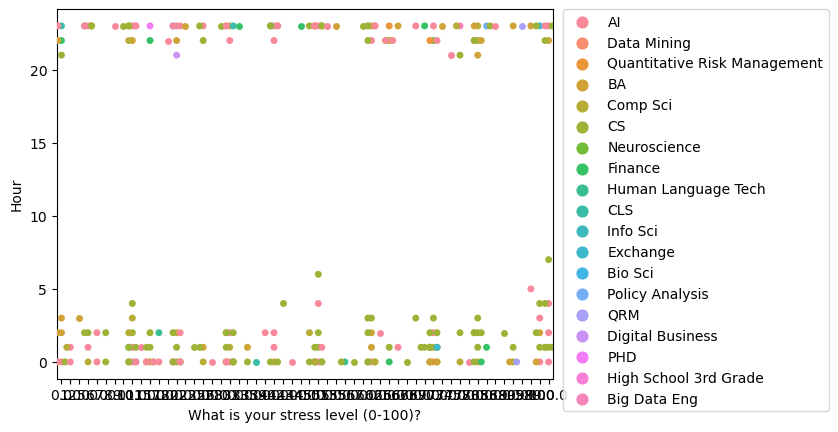

In [98]:
# x = sns.swarmplot(data=df, y=df['Hour'],x=df["What is your stress level (0-100)?"],hue=df["What programme are you in?"])
# x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

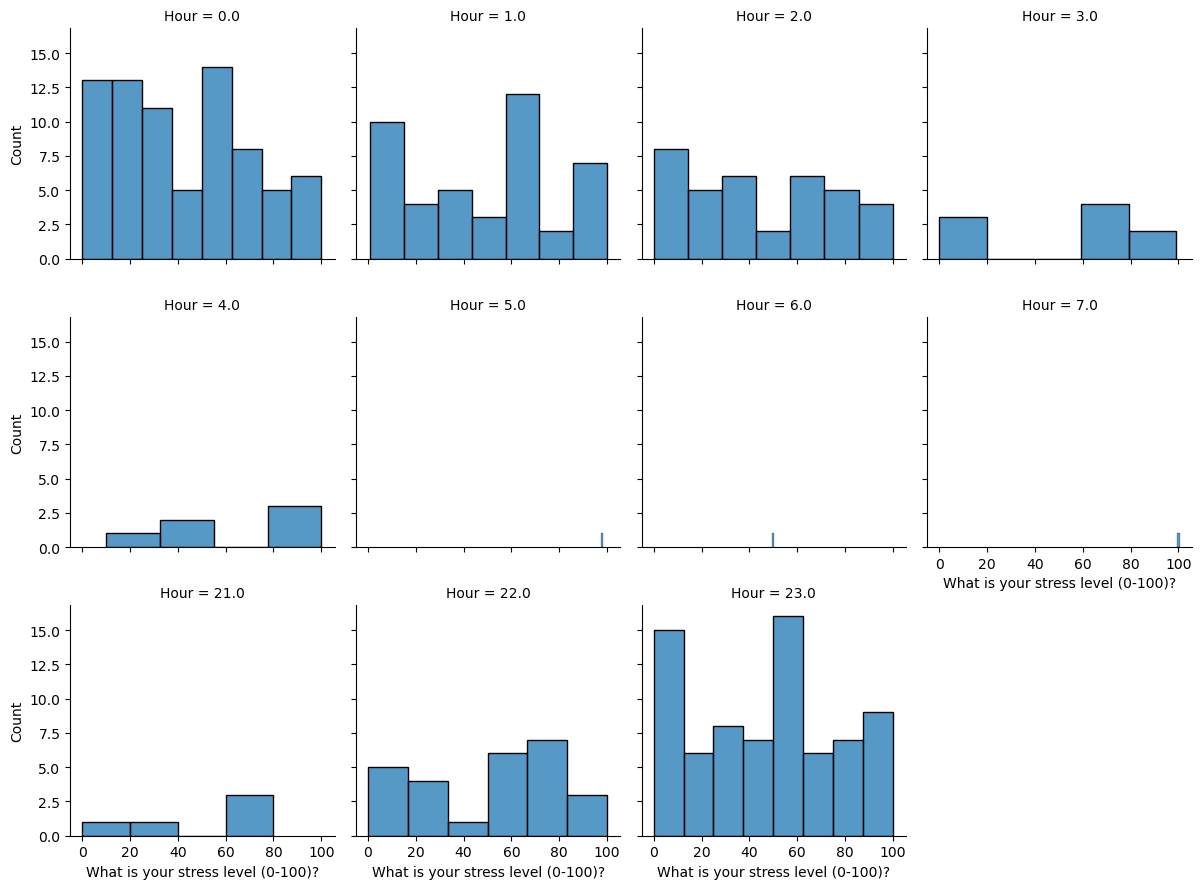

In [103]:
g = sns.FacetGrid(df, col="Hour", col_wrap=4)
g.map(sns.histplot, "What is your stress level (0-100)?")

<AxesSubplot:xlabel='What is your stress level (0-100)?'>

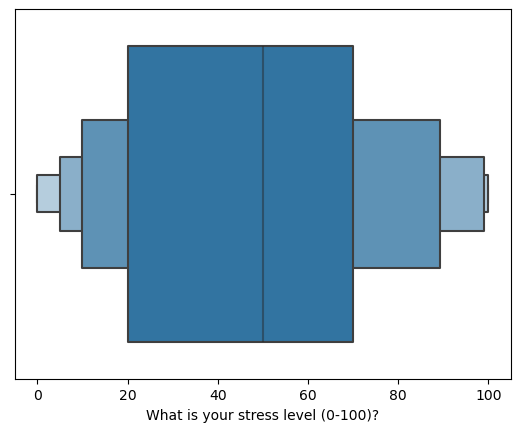

In [104]:
sns.boxenplot(df["What is your stress level (0-100)?"],)

<AxesSubplot:xlabel='What is your stress level (0-100)?', ylabel='Density'>

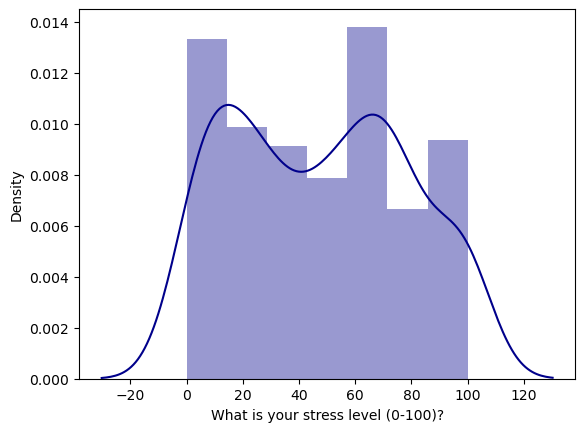

In [72]:
sns.distplot(df["What is your stress level (0-100)?"],color='darkblue')

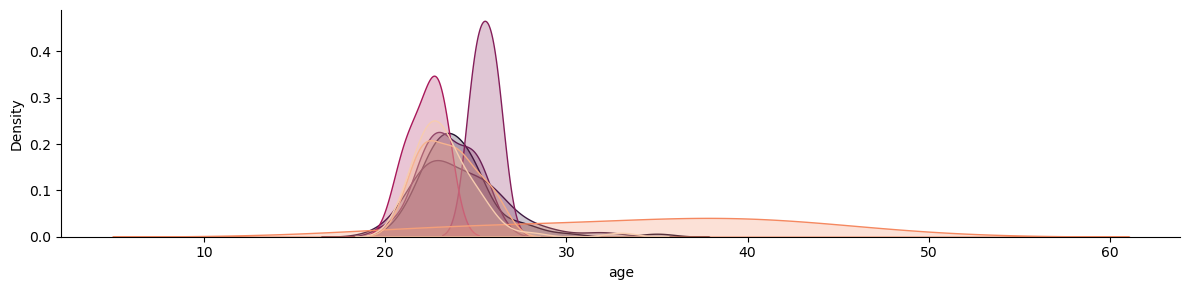

In [116]:
df = df.dropna(subset=['Hour'])
fig = sns.FacetGrid(df, hue='Hour', aspect=4, palette='rocket')
fig.map(sns.kdeplot, 'age', shade=True)

In [114]:
fig = sns.FacetGrid(df["What is your stress level (0-100)?"], hue=df'"Hour"', aspect=4,palette="rocket")
fig.map(sns.kdeplot,'age',shade=True)



KeyError: '[nan] not in index'